### - Sobhan Moradian Daghigh
#### - 7/3/2022
### - DIP - HW04 - Q3

In [1]:
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
from skimage.restoration import denoise_tv_chambolle

In [2]:
def load_datas(folder_name):
    images = glob.glob('{}*.png'.format(folder_name))
    datas = []
    names = []
    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        datas.append(img)
        names.append(image.split('\\')[-1][:-4])
    return datas, names

In [3]:
images, names = load_datas('./inputs/P3/')

In [4]:
names

['sonderkommando_photographs_280', 'sonderkommando_photographs_281']

In [5]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.figure(figsize=(5, 6))
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 5, subplots[0] * 6))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

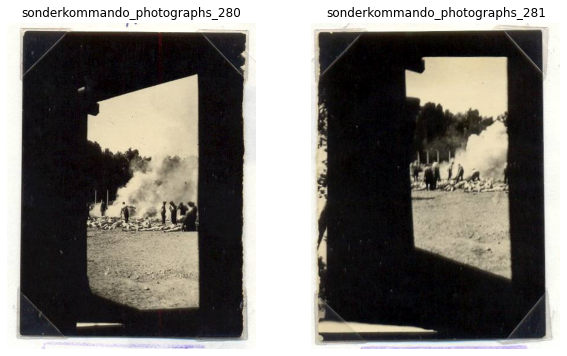

In [8]:
plotter(images, names, subplots=(1, 2))

In [9]:
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param.append([x, y])

In [10]:
def select_alignment_cordinates(img, points):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imshow('Choose', img)
    cv2.setMouseCallback('Choose', mouse_click, points)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [36]:
def align_imgs(img1):
    rows, cols, ch = img1.shape
    points = []
    select_alignment_cordinates(img1, points)
    pts1 = np.float32(points)

    points = np.array(points)
    nw = int((np.linalg.norm((points[0] + points[3]) / 2 - (points[1] + points[2]) / 2)))
    nh = int(np.linalg.norm((points[0] + points[1]) / 2 - (points[2] + points[3]) / 2))

    pts2 = np.float32([[0, 0],[nw, 0],[nw, nh],[0, nh]])
    
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(img1, M, (nw, nh))
    plotter([img1, dst], names=['img1', 'Transformed'], subplots=(1, 2))
    return dst

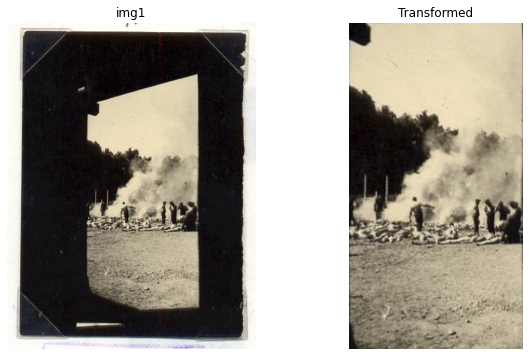

In [37]:
dst1 = align_imgs(images[0])

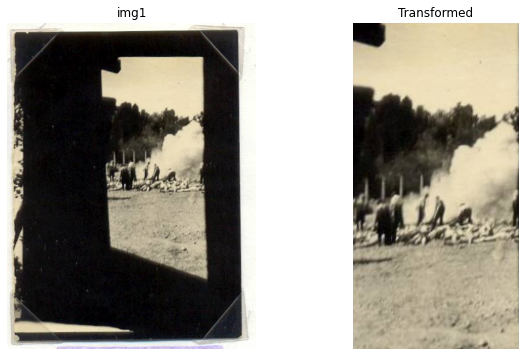

In [76]:
dst2 = align_imgs(images[1])

### Try to enhance

In [40]:
def normalizer(img):
    maximum = img.max()
    minimum = img.min()
    return ((img - minimum) / (maximum - minimum) * 255).astype(np.uint8)

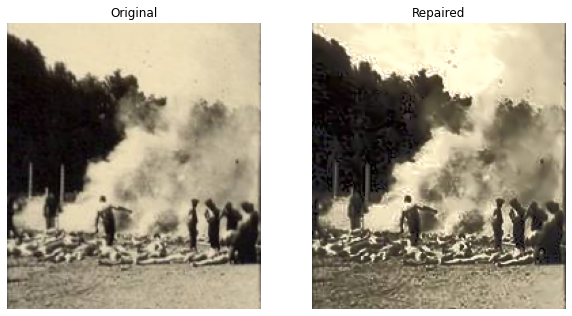

In [72]:
img = dst1[60:-80, :]

hist_eq = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
hist_eq[:, :, 0] = cv2.equalizeHist(hist_eq[:, :, 0])
hist_eq = cv2.cvtColor(hist_eq, cv2.COLOR_YUV2BGR)

kernel = np.array([[  0 , -0.2,   0  ],
                   [-0.2,  1.8, -0.2],
                   [  0 , -0.2,   0  ]])
sharped_image = cv2.filter2D(src=hist_eq, ddepth=-1, kernel=kernel)
sharped_image = cv2.fastNlMeansDenoising(sharped_image, h=7, templateWindowSize=7, searchWindowSize=7)
plotter([img, sharped_image], ['Original', 'Repaired'], subplots=(1, 2), gray=True)

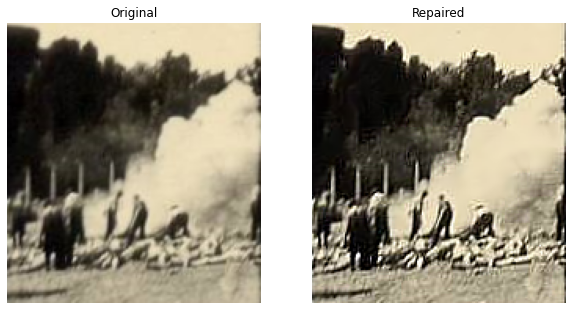

In [101]:
img = dst2[60:-80, :]

kernel = np.array([[-0.3, -0.4, -0.3],
                   [-0.4, 3.8, -0.4],
                   [-0.3, -0.4, -0.3]])

sharped_image = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
sharped_image = cv2.fastNlMeansDenoising(sharped_image, h=5, templateWindowSize=7, searchWindowSize=7)
plotter([img, sharped_image], ['Original', 'Repaired'], subplots=(1, 2), gray=True)

### Finito